In [13]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('C:\\Project_git\\MLproject\\notebook\\data\\StudentsPerformance.csv')

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.shape

(1000, 8)

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
#Check NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
#df.nunique() #Check unique values in each column

In [21]:
df.describe() #Check statistics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [27]:
print("Categories in 'gender'variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())



Categories in 'gender'variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [23]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#Define numerical & Categorical columns
numericsl_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('\we have {} numerical features:{} '.format(len(numericsl_features),numericsl_features))
print('\we have {} categorical features:{} '.format(len(categorical_features),categorical_features))

\we have 5 numerical features:['math score', 'reading score', 'writing score', 'total score', 'average score'] 
\we have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [28]:
df['total score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print("Number of students who scored 100 in reading: ", reading_full)
print("Number of students who scored 100 in writing: ", writing_full)   
print("Number of students who scored 100 in math: ", math_full)

Number of students who scored 100 in reading:  17
Number of students who scored 100 in writing:  14
Number of students who scored 100 in math:  7


In [33]:
reading_less_20 = df[df['reading score'] < 20]['average score'].count()
writing_less_20 = df[df['writing score'] < 20]['average score'].count() 
math_less_20 = df[df['math score'] < 20]['average score'].count()
print("Number of students who scored less than 20 in reading: ", reading_less_20)
print("Number of students who scored less than 20 in writing: ", writing_less_20)
print("Number of students who scored less than 20 in math: ", math_less_20)

Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in math:  4


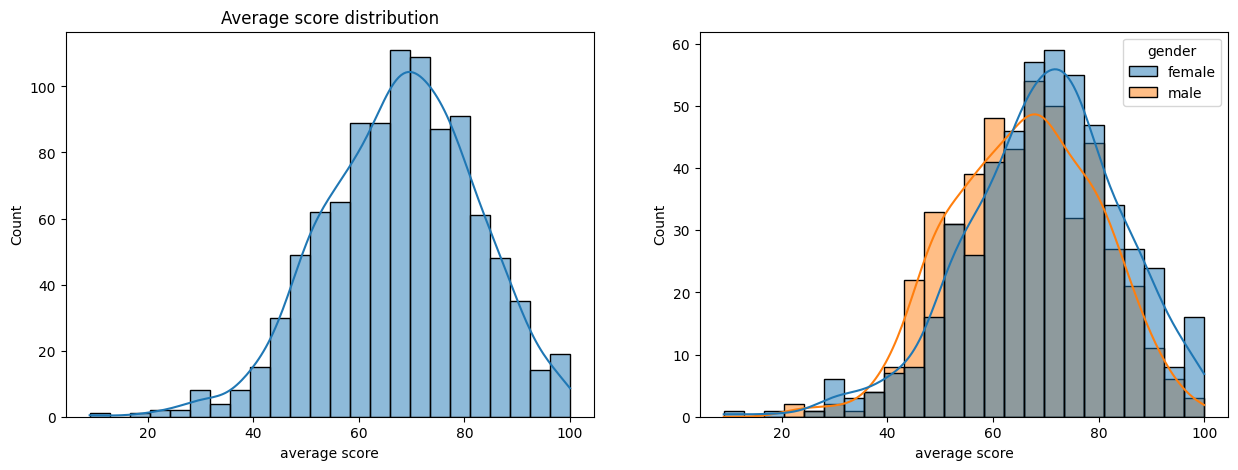

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,5)) 
plt.subplot(1,2,1)  
sns.histplot(data=df,x='average score',kde=True)
plt.title('Average score distribution')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

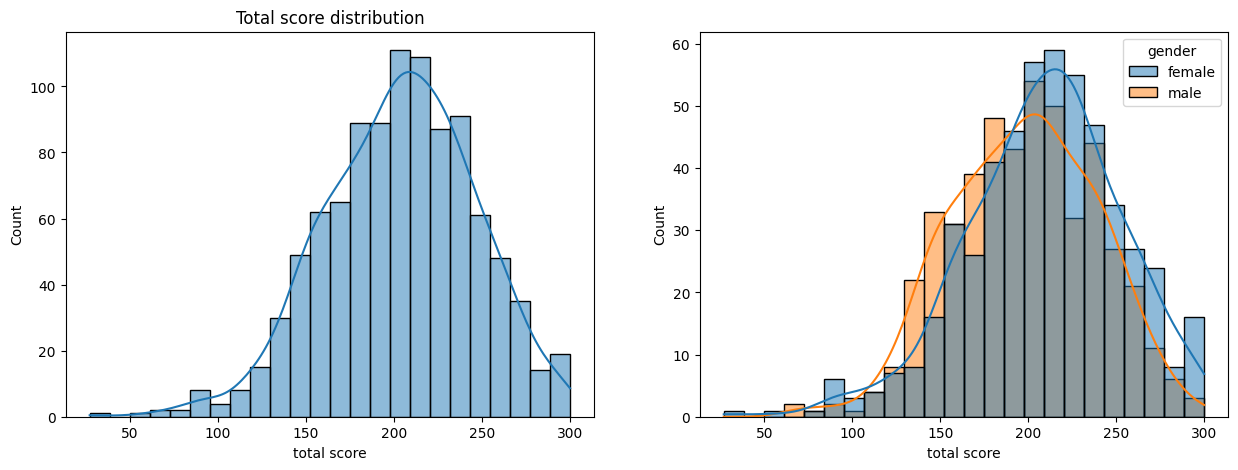

In [35]:
fig,ax=plt.subplots(1,2,figsize=(15,5)) 
plt.subplot(1,2,1)  
sns.histplot(data=df,x='total score',kde=True)
plt.title('Total score distribution')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

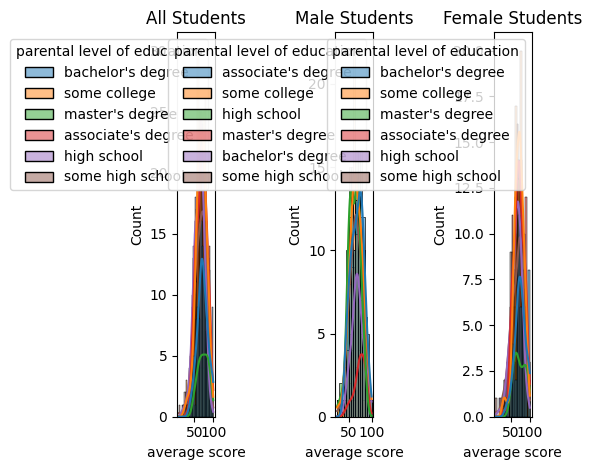

In [39]:
plt.subplot(1, 4, 1)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.title('All Students')

# Plot 2: Male students
plt.subplot(1, 4, 2)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='parental level of education')
plt.title('Male Students')

# Plot 3: Female students
plt.subplot(1, 4, 3)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='parental level of education')
plt.title('Female Students')

# (Optional) You can add a 4th plot or leave it as 3 subplots.

plt.tight_layout()
plt.show()